<a href="https://colab.research.google.com/github/FacuNieto/MLP_IA_FCEFyN/blob/main/Clase_MLP_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP

# **MLP en TensorFlow!**

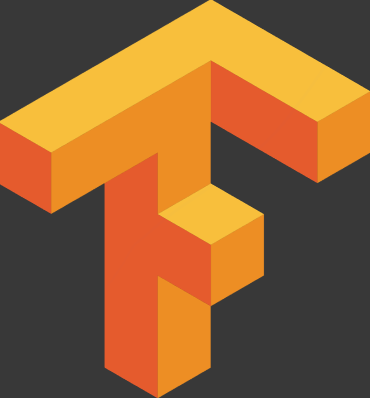





# 1. Ejemplo Iris

## 1.1 Cargar Dataset

In [3]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

plt.style.use('dark_background')

In [4]:
# Importamos el csv 
df_iris = pd.read_csv('iris.csv')

In [5]:
# Veamos el Dataframe 
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 1.2 Encoding

In [6]:
# Crear un diccionario que mapea cada etiqueta categórica de la columna "target" a su valor codificado correspondiente.
diccionario_aux = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# Inicializar una lista vacía para almacenar las etiquetas codificadas.
target_codificado = []

# Recorrer cada elemento de la columna "target" del DataFrame `df_iris`.
for elemento in df_iris["target"]:
  target_codificado.append(diccionario_aux[elemento])

# Actualizar la columna "target" del DataFrame `df_iris` con la lista de etiquetas codificadas.
df_iris["target"] = target_codificado

# Devolver el DataFrame `df_iris` con las etiquetas codificadas.
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# Otro metodo

# Importamos el csv 
df_iris = pd.read_csv('iris.csv')

# Crear objeto LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder a los datos
encoded_data = le.fit_transform(df_iris['target'])

# Imprimir los datos codificados
print(encoded_data)

df_iris['target'] = encoded_data
df_iris

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 1.3 Escalar datos

In [8]:
# Definimos datos de entrada "x" y datos de salida "y"
df_iris_data = df_iris.drop(['target'], axis = 1)
df_iris_etiquetas = df_iris['target']

In [9]:
# Escalar los datos!
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar los datos de características
df_iris_data = scaler.fit_transform(df_iris_data)

## 1.4 Definir datos de entrenamiento y de prueba

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_iris_data, df_iris_etiquetas, test_size=0.2, random_state=0)

## 1.5 Definir arquitectura del modelo

In [11]:
model_iris = tf.keras.models.Sequential([
    # Densa de 128 neuronas 
    tf.keras.layers.Dense(12, activation='relu', input_shape=(4,)),
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),

    # 3 Clases
    tf.keras.layers.Dense(3, activation='softmax')
])

In [12]:
# Veamos la arquitectura y el conteo de parametros
model_iris.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 3)                 39        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


### Pesos sinapticos

## 1.6 Compilar modelo

In [13]:
model_iris.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

## 1.7 Entrenar modelo

In [14]:
history = model_iris.fit(X_train, y_train,epochs = 100, 
                    validation_data = (X_test, y_test), 
                    verbose= 0
                    )

## 1.8 Gráficos y métricas

### 1.8.1.1 Curvas de entrenamiento

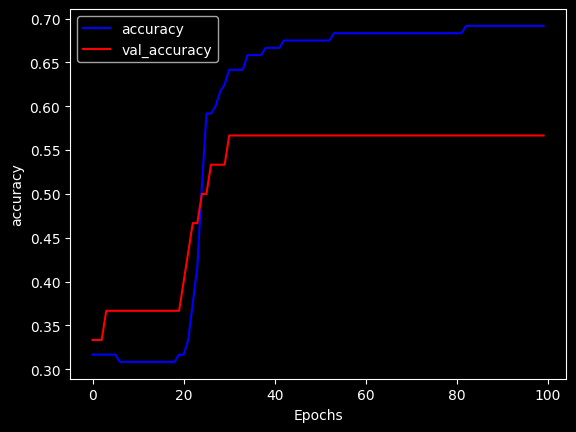

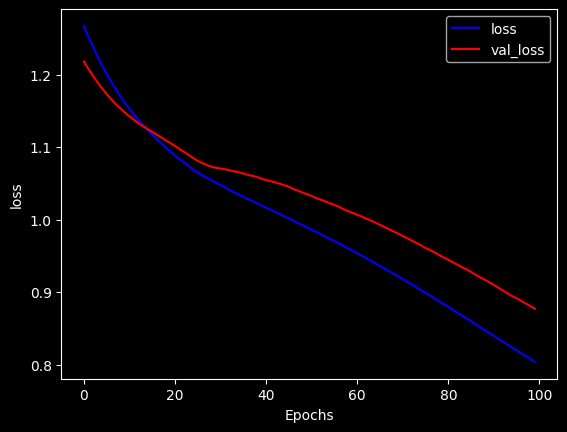

In [15]:
# Función para graficar
def plot_graphs(history, string):
  plt.plot(history.history[string], color='blue')
  plt.plot(history.history['val_'+string], color='red')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Graficar curvas de loss y accuracy para datos de entrenamiento y validación
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 1.8.1.2 Métricas y matriz de confusión

In [16]:
test_loss, test_acc = model_iris.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.8772 - accuracy: 0.5667 - 23ms/epoch - 23ms/step

Test accuracy: 0.5666666626930237


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Obtener las predicciones del modelo
y_pred = model_iris.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular los valores de precisión, recall y f1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=True)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir los resultados
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))


1/1 [==============================] - 0s 47ms/step
Precision: 0.86
Recall: 0.57
F1 score: 0.46


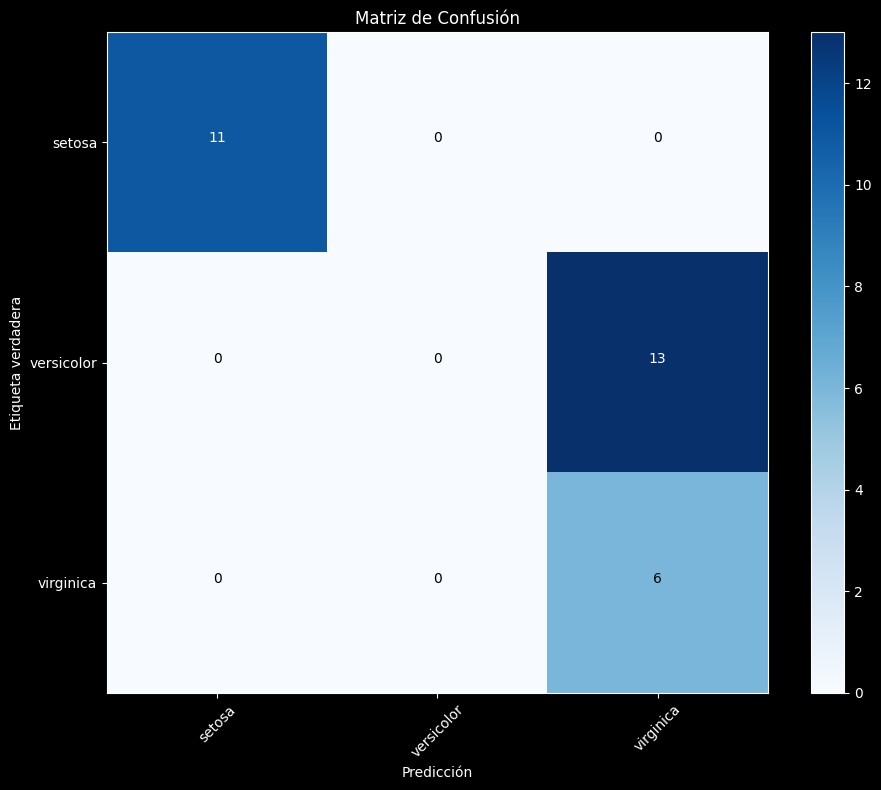

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
classes=['setosa', 'versicolor', 'virginica']
# Obtener los índices de la clase con mayor probabilidad de cada muestra

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(10,8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


## 1.9 Pruebas de predicción

In [18]:
predictions = model_iris.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [19]:
n_flor=5
clase=predictions[n_flor].argmax()
prob=str(predictions[n_flor].max())

class_names = ['setosa', 'versicolor', 'virginica']

print(f"Existe una confianza del {prob} de que esta flor corresponde a la clase: '{class_names[clase]}' y su etiqueta es: '{class_names[list(y_test)[n_flor]]}'") 

Existe una confianza del 0.59299856 de que esta flor corresponde a la clase: 'virginica' y su etiqueta es: 'virginica'


# 2 Ejemplo Fashion mnist

## 2.1 Carga de dataset y definición de datos de entrenamiento y prueba

In [20]:
# Dividimos en train y test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
train_labels.shape

(60000,)

In [23]:
type(train_images)

numpy.ndarray

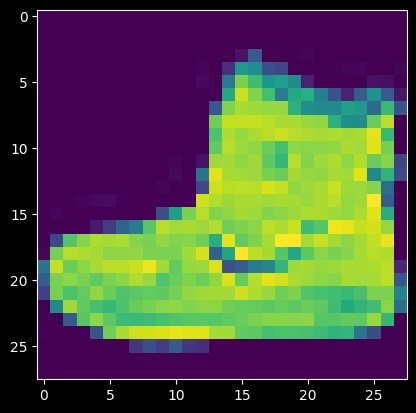

In [24]:
plt.imshow(train_images[0]);

In [25]:
train_images = train_images.astype('float32') / 255 
test_images = test_images.astype('float32') / 255

In [26]:
train_images = train_images.reshape(train_images.shape[0],28, 28, 1) # el 1 es de un canal ya que estamos en escalda de grises, si fuera RGB seria 3.
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [27]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10) # esta biblioteca sirve para poder estandarizar
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [28]:
train_images.shape

(60000, 28, 28, 1)

In [29]:
train_labels.shape

(60000, 10)

## Definimos arquitectura, compilamos y entrenamos

In [30]:
model_fmnist = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    # Definimos entrada de 28,28 a color
    tf.keras.layers.Flatten(),
    # Densa de 128 neuronas 
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
    # 3 Clases
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
model_fmnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Optimizadores en TF:

Adadelta: Optimizer that implements the Adadelta algorithm.

Adagrad: Optimizer that implements the Adagrad algorithm.

**Adam: Optimizer that implements the Adam algorithm.**

Adamax: Optimizer that implements the Adamax algorithm.

Ftrl: Optimizer that implements the FTRL algorithm.

Nadam: Optimizer that implements the NAdam algorithm.

Optimizer: Base class for Keras optimizers.

**RMSprop: Optimizer that implements the RMSprop algorithm.**

SGD: Gradient descent (with momentum) optimizer.*texto en cursiva*

https://www.tensorflow.org/api_docs/python/tf/optimizers

In [32]:
from keras.optimizers import Adam
model_fmnist.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Losses:

BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.

BinaryFocalCrossentropy: Computes the focal cross-entropy loss between true labels and predictions.

CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

CategoricalHinge: Computes the categorical hinge loss between y_true and y_pred.

CosineSimilarity: Computes the cosine similarity between labels and predictions.

Hinge: Computes the hinge loss between y_true and y_pred.

Huber: Computes the Huber loss between y_true and y_pred.

KLDivergence: Computes Kullback-Leibler divergence loss between y_true and y_pred.

LogCosh: Computes the logarithm of the hyperbolic cosine of the prediction error.

Loss: Loss base class.

MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.

MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.

MeanSquaredError: Computes the mean of squares of errors between labels and predictions.

MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.

Poisson: Computes the Poisson loss between y_true and y_pred.

Reduction: Types of loss reduction.

SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

SquaredHinge: Computes the squared hinge loss between y_true and y_pred.

https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [33]:
history = model_fmnist.fit(train_images, train_labels,epochs = 15, 
                    validation_data = (test_images, test_labels), 
                    verbose = 1, 
                    )

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7911 - accuracy: 0.7441 - val_loss: 0.5812 - val_accuracy: 0.8064
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5108 - accuracy: 0.8291 - val_loss: 0.5041 - val_accuracy: 0.8273
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4605 - accuracy: 0.8447 - val_loss: 0.4754 - val_accuracy: 0.8365
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4330 - accuracy: 0.8522 - val_loss: 0.4532 - val_accuracy: 0.8426
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4146 - accuracy: 0.8581 - val_loss: 0.4396 - val_accuracy: 0.8465
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4005 - accuracy: 0.8619 - val_loss: 0.4303 - val_accuracy: 0.8497
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3886 - accuracy: 0.8662 - val_loss: 0.4290 - val_accuracy:

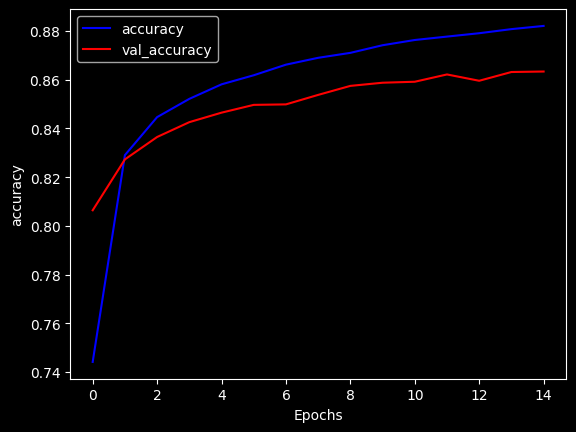

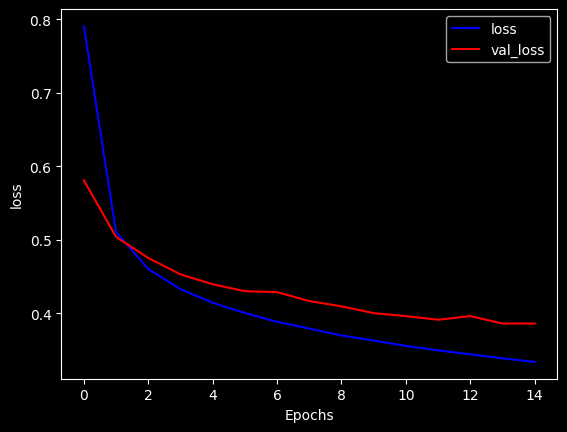

In [34]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string], color='blue')
  plt.plot(history.history['val_'+string], color='red')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Continuamos con la evaluación del modelo

In [35]:
test_loss, test_acc = model_fmnist.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3862 - accuracy: 0.8634 - 464ms/epoch - 1ms/step

Test accuracy: 0.8633999824523926


In [36]:
predictions = model_fmnist.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Existe una confianza del 0.7336286 de que esta imagen corresponde a la clase: "Pullover"


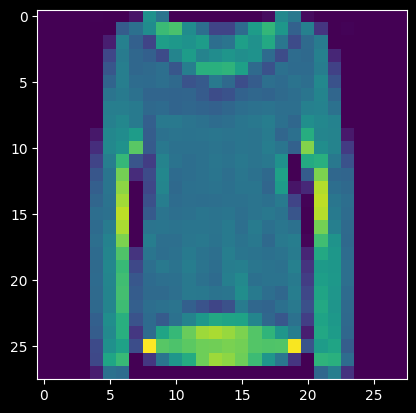

In [37]:
n_imagen=356
clase=predictions[n_imagen].argmax()
prob=str(predictions[n_imagen].max())

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('Existe una confianza del ' + prob + ' de que esta imagen corresponde a la clase: "' + class_names[clase]+'"') 
plt.imshow(test_images[n_imagen].reshape(28, 28))
plt.show()

# Tarea



*   Replicar y obtener mejores metricas
*   Graficar curvas de accuracy y loss



# Links!!!